# PERKENALAN

Nama: Fathur Rachman
FTDS Batch 003

Kali ini akan berperan sebagai seorang data scientist yang bekerja di sebuah bank. Kasusnya adalah untuk memprediksi dan memberikan tools yang lebih baik kepada pihak bank dan membantu pihak marketing dalam melakukan promosi secara langsung kepada nasabah bank secara efektif dan efisien. Dataset yang digunakan:

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

# IMPORT LIBRARY

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# UPLOAD DATASET

In [2]:
data = pd.read_csv('bank-additional-full.csv', sep = ';')
pd.set_option('display.max_columns', None)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


bank client data:

1. age (numeric)
2. job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
3. marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y', 'basic.6y', 'basic.9y' ,'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown') related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

other attributes:

12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

social and economic context attributes

16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

21. y - has the client subscribed a term deposit? (binary: 'yes','no')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

# DATA CLEANING

In [5]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Data yang digunakan ternyata sudah bersih. Oleh sebab itu berlanjut ke proses berikutnya.

# EKSPLORASI DATA

<AxesSubplot:title={'center':'Status Deposit'}>

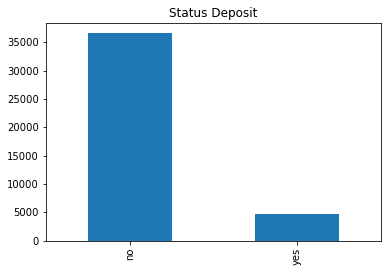

In [6]:
deposit_counts = data['y'].value_counts()
deposit_counts.plot.bar(title = 'Status Deposit')

Status deposit yang diterima dan mau digunakan oleh nasabah sebesar 5000 orang. Hal ini berbanding terbalik ketika nasabah menolak produk atau layanan baru hingga hampir mencapai 35ribu.

<AxesSubplot:title={'center':'Bulan dengan Nasabah Merima Deposit Baru'}>

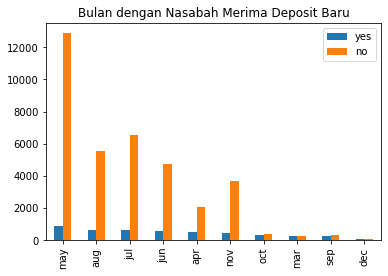

In [7]:
#Berapa banyak deposit yang di proses (yes and no)

month_deposit = pd.DataFrame()

month_deposit['yes'] = data[data['y'] == 'yes']['month'].value_counts()
month_deposit['no'] = data[data['y'] == 'no']['month'].value_counts()

month_deposit.plot.bar(title = 'Bulan dengan Nasabah Merima Deposit Baru')

Dari grafik dapat terlihat bahwa pada bulan Mei memiliki pengajuan paling banyak. Hal ini berbanding lurus dengan jumlah penolakan pengajuan pinjaman dan menerima proposal pinjaman dari pihak nasabah.

<AxesSubplot:title={'center':'Status Hubungan dengan Deposit'}>

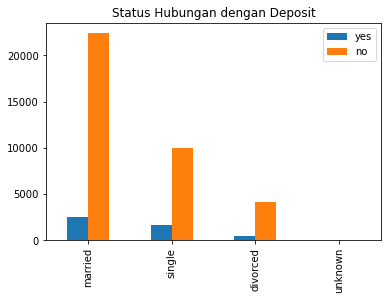

In [8]:
#status pernikahan dengan deposit

marital_deposit = pd.DataFrame()

marital_deposit['yes'] = data[data['y'] == 'yes']['marital'].value_counts()
marital_deposit['no'] = data[data['y'] == 'no']['marital'].value_counts()

marital_deposit.plot.bar(title = 'Status Hubungan dengan Deposit')

Dapat diambil kesimpulan memiliki status pernikahan lebih besar menerima dan menggunakan deposit yang ditawarkan dari pihak bank.

<AxesSubplot:title={'center':'Pendidikan dengan deposit'}>

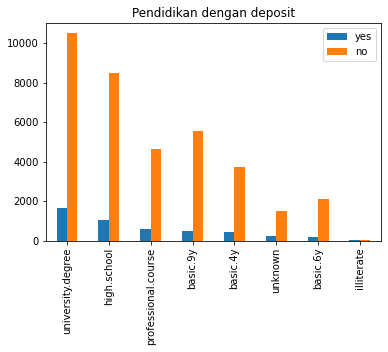

In [9]:
#pendidikan dengan deposit

edu_data = pd.DataFrame()

edu_data['yes'] = data[data['y'] == 'yes']['education'].value_counts()
edu_data['no'] = data[data['y'] == 'no']['education'].value_counts()

edu_data.plot.bar(title = 'Pendidikan dengan deposit')

Dapat diambil kesimpulan memiliki status pendidikan universitas lebih besar menerima dan menggunakan deposit yang ditawarkan dari pihak bank.

<AxesSubplot:title={'center':'Kontak secara seluler dan telephone dengan deposit'}>

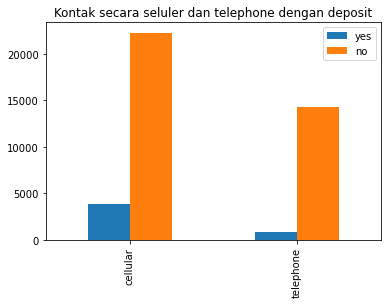

In [10]:
#contact celluler dengan deposit
contact_data = pd.DataFrame()

contact_data['yes'] = data[data['y'] == 'yes']['contact'].value_counts()
contact_data['no'] = data[data['y'] == 'no']['contact'].value_counts()

contact_data.plot.bar(title = 'Kontak secara seluler dan telephone dengan deposit')

Dapat diambil kesimpulan memiliki status pernikahan lebih besar menerima dan menggunakan deposit yang ditawarkan dari pihak bank.

# DATA PREPROCESSING

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [13]:
#persiapan encoded

# Numeric features
cols_num = ['age', 'duration', 'campaign', 'pdays', 'previous',
           'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
           'euribor3m', 'nr.employed']

# Categorical and binary
cols_cat = ['job', 'marital', 'education', 'default', 'housing',
            'loan', 'contact', 'month', 'day_of_week', 'poutcome']

In [14]:
# One-Hot Encoding
cols_new_cat = pd.get_dummies(data[cols_cat], drop_first=False)
cols_new_cat.head()
data['y']=data.y.replace({'no':0, 'yes':1}).astype(int)

data1 = pd.concat([data, cols_new_cat], axis=1)
data1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [15]:
cleandata = data1.drop(['job', 'marital', 'education', 'default', 'housing',
            'loan', 'contact', 'month', 'day_of_week', 'poutcome'], axis=1)
cleandata.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [16]:
cleandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  y                              41188 non-null  int32  
 11  job_admin.                     41188 non-null  uint8  
 12  job_blue-collar                41188 non-null 

In [17]:
x = cleandata.drop(columns='y')
x.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [18]:
y = cleandata[['y']]
y.head()

,y
0,0
1,0
2,0
3,0
4,0


Setelah features telah siap digunakan, kemudian akan dilakukan proses split data menjadi 3 bagian, yaitu Train, Test, dan Evaluation (digunakan untuk model inference) dengan komposisi sebesar 80 untuk Train, 10 untuk Test dan 10 untuk Evaluation

In [19]:
#Split Train Test
x_train, x_rem, y_train, y_rem = train_test_split(x, y, train_size=0.8, random_state = 42, stratify = y)

#Split Test Eval
x_test, x_eval, y_test, y_eval = train_test_split(x_rem, y_rem, test_size = 0.5, random_state = 42, stratify = y_rem)

In [20]:
print("Total x_train = ", x_train.shape)
print("Total y_train = ", y_train.shape)
print("Total x_eval = ", x_eval.shape)
print("Total y_eval = ", y_eval.shape)
print("Total x_test = ", x_test.shape)
print("Total y_test = ", y_test.shape)

Total x_train =  (32950, 63)
Total y_train =  (32950, 1)
Total x_eval =  (4119, 63)
Total y_eval =  (4119, 1)
Total x_test =  (4119, 63)
Total y_test =  (4119, 1)


In [21]:
#Scaling data
scaler = StandardScaler()

#Fit Transform x_train
X_train_scaled = scaler.fit_transform(x_train)

#Transform x_train for predict data train
X_train_transform = scaler.transform(x_train)

#Transform x_test
X_test_scaled = scaler.transform(x_test)

#Transform x_eval
X_eval_scaled = scaler.transform(x_eval)

# PENDEFINISIAN MODEL

In [22]:
#Define Logistic Regression
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(max_iter=500)

# Model SVM Classifier
from sklearn.svm import SVC
SVC = SVC(C=0.5)

#Model Decision Tree
from sklearn.tree import DecisionTreeClassifier
DesTree = DecisionTreeClassifier()

#Define Random Forest
from sklearn.ensemble import RandomForestClassifier
RanFors = RandomForestClassifier(n_estimators=100, max_leaf_nodes=8,
                                 random_state = 42)

#Model KNN
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=20)

#Model Naive Bayes
from sklearn.naive_bayes import GaussianNB
Nav = GaussianNB()

#Define ADA Boosting
from sklearn.ensemble import AdaBoostClassifier
ADA = AdaBoostClassifier(n_estimators=100, random_state=42)

#Define Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
Grad = GradientBoostingClassifier(n_estimators=100, max_depth=5, 
                                  learning_rate=0.1, random_state=42)

# PELATIHAN MODEL

### Logistic Regression 

In [23]:
#Training Logistic Regression Model
LogReg.fit(X_train_scaled, y_train)

#Predict Logistic Regression Model from Train Data
y_pred_train_lr = LogReg.predict(X_train_transform)
y_pred_train_lr

#Predict Logistic Regression Model from Test Data
y_pred_test_lr = LogReg.predict(X_test_scaled)
y_pred_test_lr

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([0, 0, 0, ..., 0, 0, 0])

### SVM Classifier

In [24]:
#Training SVM Model
SVC.fit(X_train_scaled, y_train)

#Predict SVM Model from Train Data
y_pred_train_svm = SVC.predict(X_train_transform)
y_pred_train_svm

#Predict SVM Model from Test Data
y_pred_test_svm = SVC.predict(X_test_scaled)
y_pred_test_svm

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([0, 0, 0, ..., 0, 0, 0])

### Decision Tree

In [25]:
#Training Decision Tree Model
DesTree.fit(X_train_scaled, y_train)

#Predict Decision Tree from Train Data
y_pred_train_dt = DesTree.predict(X_train_transform)
y_pred_train_dt

#Predict Decision Tree from Test Data
y_pred_test_dt = DesTree.predict(X_test_scaled)
y_pred_test_dt

array([0, 0, 0, ..., 0, 0, 0])

### Random Forest 

In [26]:
#Training Randon Forest Model
RanFors.fit(X_train_scaled, y_train)

#Predict Model Random Forest from Train Data
y_pred_train_rf = RanFors.predict(X_train_transform)
y_pred_train_rf

#Predict Model Random Forest from Test Data
y_pred_test_rf = RanFors.predict(X_test_scaled)
y_pred_test_rf

<ipython-input-26-0278afa73069>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RanFors.fit(X_train_scaled, y_train)


array([0, 0, 0, ..., 0, 0, 0])

### KNN

In [27]:
#Training KNN Model
KNN.fit(X_train_scaled, y_train)

#Predict KNN Model  from Train Data
KNN_y_pred_train = KNN.predict(X_train_transform)
KNN_y_pred_train

#Predict KNN Model  from Test Data
KNN_y_pred_test = KNN.predict(X_test_scaled)
KNN_y_pred_test

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([0, 0, 0, ..., 0, 0, 0])

### Naive Bayes

In [28]:
#Training Naive Bayes Model
Nav.fit(X_train_scaled, y_train)

#Predict Naive Bayes Model from Train Data
Naive_y_pred_train = Nav.predict(X_train_transform)
Naive_y_pred_train

#Predict Naive Bayes Model from Test Data
Naive_y_pred_test = Nav.predict(X_test_scaled)
Naive_y_pred_test

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([0, 0, 0, ..., 0, 0, 0])

### Ada Boost

In [29]:
#Training Model Ada Boosting
ADA.fit(X_train_scaled, y_train)

#Predict Model Ada Boosting from Train Data
y_pred_train_ada = ADA.predict(X_train_transform)
y_pred_train_ada

#Predict Model Ada Boosting from Test Data
y_pred_test_ada = ADA.predict(X_test_scaled)
y_pred_test_ada

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([0, 0, 0, ..., 0, 0, 0])

### Gradient Boost

In [30]:
#Training Gradient Boosting
Grad.fit(X_train_scaled, y_train)

#Predict Model Gradient Boosting from Train Data
y_pred_train_gradient = Grad.predict(X_train_transform)
y_pred_train_gradient

#Predict Model Gradient Boosting from Test Data
y_pred_test_gradient = Grad.predict(X_test_scaled)
y_pred_test_gradient

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([0, 0, 0, ..., 0, 0, 0])

# EVALUASI MODEL

## Accuracy Score

### Logistic Regression 

In [31]:
#Accuracy Logistic Regression Model Train Data
accuracy_train_logreg = accuracy_score(y_train, y_pred_train_lr)
print('Accuracy Model Train Logistic Regression = ', accuracy_train_logreg)

#Accuracy Logistic Regression Model Test Data
accuracy_train_logreg = accuracy_score(y_test, y_pred_test_lr)
print('Accuracy Model Test Logistic Regression = ', accuracy_train_logreg)

Accuracy Model Train Logistic Regression =  0.9101062215477997
Accuracy Model Test Logistic Regression =  0.9184268026219956


### SVM Classifier

In [32]:
#Accuracy SVM Model Train Data
accuracy_train_logreg = accuracy_score(y_train, y_pred_train_svm)
print('Accuracy Model Train SVM Classifier = ', accuracy_train_logreg) 

#Accuracy SVM Model Test Data
accuracy_train_logreg = accuracy_score(y_test, y_pred_test_svm)
print('Accuracy Model Test SVM Classifier = ', accuracy_train_logreg)

Accuracy Model Train SVM Classifier =  0.9158421851289833
Accuracy Model Test SVM Classifier =  0.9147851420247632


### Decision Tree

In [33]:
#Accuracy Decision Tree Model Train Data
accuracy_train_destree = accuracy_score(y_train, y_pred_train_dt)
print('Accuracy Model Train Decision Tree = ', accuracy_train_destree)

#Accuracy Decision Tree Model Test Data
accuracy_train_destree = accuracy_score(y_test, y_pred_test_dt)
print('Accuracy Model Test Decision Tree = ', accuracy_train_destree)

Accuracy Model Train Decision Tree =  1.0
Accuracy Model Test Decision Tree =  0.8912357368293276


### Random Forest 

In [34]:
#Accuracy Model Random Forest Train Data
accuracy_train_random_forest = accuracy_score(y_train, y_pred_train_rf)
print('Accuracy Model Train Random Forest = ', accuracy_train_random_forest)

#Accuracy Model Random Forest Test Data
accuracy_test_random_forest = accuracy_score(y_test, y_pred_test_rf)
print('Accuracy Model Test Random Forest = ', accuracy_test_random_forest)

Accuracy Model Train Random Forest =  0.901092564491654
Accuracy Model Test Random Forest =  0.9011896091284293


### KNN

In [35]:
#Accuracy KNN Model Train Data
accuracy_train_knn = accuracy_score(y_train, KNN_y_pred_train)
print('Accuracy KNN Model Train = ', accuracy_train_knn)

#Accuracy KNN Model Test Data
accuracy_test_knn = accuracy_score(y_test, KNN_y_pred_test)
print('Accuracy KNN Model Test = ', accuracy_train_knn)

Accuracy KNN Model Train =  0.902154779969651
Accuracy KNN Model Test =  0.902154779969651


### Naive Bayes

In [36]:
#Accuracy Naive Bayes Model Train Data
accuracy_train_naive = accuracy_score(y_train, Naive_y_pred_train)
print('Accuracy Naive Bayes Model Train = ', accuracy_train_naive)

#Accuracy Naive Bayes Model Test Data
accuracy_test_naive = accuracy_score(y_test, Naive_y_pred_test)
print('Accuracy Naive Bayes Test = ', accuracy_test_naive)

Accuracy Naive Bayes Model Train =  0.7430045523520485
Accuracy Naive Bayes Test =  0.7448409808205875


### Ada Boost

In [37]:
#Accuracy ADA Boost Model Train Data
accuracy_train_ada = accuracy_score(y_train, y_pred_train_ada)
print('Accuracy Model Train ADA Boosting = ', accuracy_train_ada)

#Accuracy ADA Boost Model Test Data
accuracy_test_ada = accuracy_score(y_test, y_pred_test_ada)
print('Accuracy Model Test ADA Boosting = ', accuracy_test_ada)

Accuracy Model Train ADA Boosting =  0.910288315629742
Accuracy Model Test ADA Boosting =  0.9089584850691915


### Gradient Boost

In [38]:
#Accuracy Model Gradient Boosting Train Data
accuracy_train_gradient = accuracy_score(y_train, y_pred_train_gradient)
print('Accuracy Model Train Gradient Boosting = ', accuracy_train_gradient)

#Accuracy Model Gradient Boosting Test Data
accuracy_test_gradient = accuracy_score(y_test, y_pred_test_gradient)
print('Accuracy Model Test Gradient Boosting = ', accuracy_test_gradient)

Accuracy Model Train Gradient Boosting =  0.9356297420333839
Accuracy Model Test Gradient Boosting =  0.9237679048312697


Dari hasil akurasi dapat disimpulkan bahwa saya memilih Gradient Boosting Model. Hal ini dikarenakan nilai akurasi pada training dan test dapat dikategorikan sebgai fit karena gap antar train dan test tidak besar dibandingkan dengan tools lainnya. Namun pembuktian ini harus diuji kembali pada classification report.

## Classification Report

In [39]:
#Predict Model Random Forest
y_pred_eval_rf = RanFors.predict(X_eval_scaled)

#Predict Model Ada Boosting
y_pred_eval_ada = ADA.predict(X_eval_scaled)

#Predict Model Gradient Boosting
y_pred_eval_gradient = Grad.predict(X_eval_scaled)

### Logistic Regression

In [40]:
#Classification Report Logistic Regression Model
print(classification_report(y_eval, y_pred_test_lr))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      3655
           1       0.12      0.08      0.09       464

    accuracy                           0.83      4119
   macro avg       0.50      0.50      0.50      4119
weighted avg       0.80      0.83      0.82      4119



### SVM Model

In [41]:
#Classification Report SVM Model
print(classification_report(y_eval, y_pred_test_svm))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      3655
           1       0.12      0.06      0.08       464

    accuracy                           0.85      4119
   macro avg       0.51      0.50      0.50      4119
weighted avg       0.80      0.85      0.82      4119



### Decision Tree

In [42]:
#Classification Decision Tree Report
print(classification_report(y_eval, y_pred_test_dt))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      3655
           1       0.13      0.13      0.13       464

    accuracy                           0.80      4119
   macro avg       0.51      0.51      0.51      4119
weighted avg       0.80      0.80      0.80      4119



### Random Forest

In [43]:
#Classification Report Model Random Forest
print(classification_report(y_eval, y_pred_eval_rf))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3655
           1       0.81      0.16      0.27       464

    accuracy                           0.90      4119
   macro avg       0.86      0.58      0.61      4119
weighted avg       0.89      0.90      0.87      4119



### KNN

In [44]:
#Classification Report KNN Model
print(classification_report(y_eval, KNN_y_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      3655
           1       0.11      0.04      0.05       464

    accuracy                           0.86      4119
   macro avg       0.50      0.50      0.49      4119
weighted avg       0.80      0.86      0.83      4119



### Naive Bayes

In [45]:
#Classification Report Naive Bayes Model
print(classification_report(y_eval, Naive_y_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.68      0.77      3655
           1       0.12      0.34      0.18       464

    accuracy                           0.64      4119
   macro avg       0.50      0.51      0.47      4119
weighted avg       0.80      0.64      0.70      4119



### ADA Boost

In [46]:
#Classification Report Model Ada Boosting
print(classification_report(y_eval, y_pred_eval_ada))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      3655
           1       0.69      0.43      0.53       464

    accuracy                           0.91      4119
   macro avg       0.81      0.70      0.74      4119
weighted avg       0.90      0.91      0.90      4119



### Gradient Boost 

In [47]:
#Classification Report Model Gradient Boosting
print(classification_report(y_eval, y_pred_eval_gradient))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3655
           1       0.70      0.57      0.63       464

    accuracy                           0.92      4119
   macro avg       0.82      0.77      0.79      4119
weighted avg       0.92      0.92      0.92      4119



Pada classification report peneliti berfokus pada recall dengan value 1. Hal ini dikarenakan karena untuk memperbesar jangkauan marketing bank namun tetap terukur. Hal ini mengingat bahwa recall untuk memprediksi kira-kira seberapa besar nasabah yang dapat dijadikan target oleh tip marketing dengan asumsi target marketing merupakan target potential. Sebagai contoh pihak marketing memprediksi nasabah A tidak akan menggunakan produk dan layanan bank tetapi ternyata nasabah A berminat untuk menggunakannya. Oleh sebab itu dicari recall dengan nilai yang lebih besar. Oleh sebab itu digunakan tools gradient boost.

# Cross Validation 

In [48]:
#Logistic Regression
log_scores = cross_val_score(LogReg, x_train, y_train, cv=4)
log_reg_mean = log_scores.mean()

#SVC
svc_scores = cross_val_score(SVC, x_train, y_train, cv=4)
svc_mean = svc_scores.mean()

#Decision Tree
tree_scores = cross_val_score(DesTree, x_train, y_train, cv=4)
tree_mean = tree_scores.mean()

#Random Forest Classifier
rand_scores = cross_val_score(RanFors, x_train, y_train, cv=4)
rand_mean = rand_scores.mean()

#KNN Classifier
knn_scores = cross_val_score(KNN, x_train, y_train, cv=4)
knn_mean = knn_scores.mean()

# Naives Bayes
nav_scores = cross_val_score(Nav, x_train, y_train, cv=4)
nav_mean = nav_scores.mean()

#ADA Boosting Classifier
ada_scores = cross_val_score(ADA, x_train, y_train, cv=4)
ada_mean = ada_scores.mean()

#Gradient Boosting Classifier
grad_scores = cross_val_score(Grad, x_train, y_train, cv=4)
grad_mean = grad_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg','SVC','Dec Tree','Ran Forest','KNN',
                     'Naive Bayes','ADA Boost','Gradient Boost'], 
    'Crossval Mean Scores': [log_reg_mean, svc_mean, tree_mean, rand_mean, 
                             knn_mean, nav_mean, ada_mean, grad_mean]}

result_df = pd.DataFrame(data=d)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [49]:
result_df = result_df.sort_values(by=['Crossval Mean Scores'], ascending=False)
result_df

,Classifiers,Crossval Mean Scores
7,Gradient Boost,0.913232
0,Logistic Reg,0.909954
4,KNN,0.908437
6,ADA Boost,0.908346
3,Ran Forest,0.900941
1,SVC,0.897420
2,Dec Tree,0.888103
5,Naive Bayes,0.860516


Pada Cross Validation melihat dan menguji apakah tools yang digunakan memiliki nilai yang konsisten dibandingkan pada pengujian sebelumnya. Sebelumnya peneliti menggunakan KNN model untuk diterapkan pada model inference. Setelah melakukan validasi kembali, didapatkan bahwa nilai dari gradient boost model pada cross validation sebesar 0.913232. Sementara nilai pada akurasi train test sebesar 0.935 dan test =  0.923. Hal ini menunjukkan bahwa model KNN konsisten dan dapat digunakan pada prediksi.

# MODEL SAVING

In [50]:
Predict = Grad.predict(x_test)

# MODEL INFERENCE

In [52]:
a = np.array([Predict])
a = pd.DataFrame(Predict)
print(a.value_counts())

0    4073
1      46
dtype: int64


value 0 = kemungkinan besar ditolak nasabah

value 1 = kemungkinan besar diterima nasabah

# KESIMPULAN

Pada Notebook ini telah dilakukan proses pemodelan terhadap data marketing. Tujuan dari melakukan proses ini adalah untuk memberikan tools mana yang terbaik untuk tim marketing serta dapat memprediksi nasabah potensial mana yang dapat dijadikan target sasaran untuk tim marketing agar dapat bekerja dengan efisien dan efektif.

- Dalam prosesnya dilakukan preprocessing berupa:

1. Label encoding binary pada kolom job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome, dan y.
2. Melakukan split train test, split test eval, dan scaling data

- Model yang digunakan dalam test ini adalah:

1. Logistic Regression
2. SVM
3. Decision Tree
4. Random Forest
5. KNN
6. Naive Bayes
7. ADA Boost
8. Gradient Boost

- Model yang digunakan adalah:

Gradient Boost. Hal ini dikarenakan memiliki akurasi yang lebih baik, nilai recall 1 lebih baik, serta lebih konsisten pada uji cross validation. Dari hasil prediksi pada model inference didapatkan bahwa nilai cakupan optimal target pasar dari pihak bank adalah 46 orang.